In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = tf.keras.datasets.mnist

In [3]:
(X_train,y_train),(X_test,y_test) = data.load_data()

In [4]:
 X_train,X_test = X_train/255.0, X_test/255.0

In [8]:
X_train.shape

(60000, 28, 28)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape =( 28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
r = model.fit(X_train,y_train,validation_data=(X_test,y_test) ,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2942 - accuracy: 0.9145 - val_loss: 0.1525 - val_accuracy: 0.9552
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1416 - accuracy: 0.9582 - val_loss: 0.1001 - val_accuracy: 0.9691
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1072 - accuracy: 0.9672 - val_loss: 0.0856 - val_accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0881 - accuracy: 0.9729 - val_loss: 0.0791 - val_accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0730 - accuracy: 0.9774 - val_loss: 0.0696 - val_accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0654 - accuracy: 0.9798 - val_loss: 0.0706 - val_accuracy: 0.9778
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0585 - accuracy: 0.9813 - val_loss: 0.0719 - val_accuracy:

In [20]:
y_pred = model.predict(X_test).argmax(axis=1)

In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9804


[0.06861017644405365, 0.980400025844574]

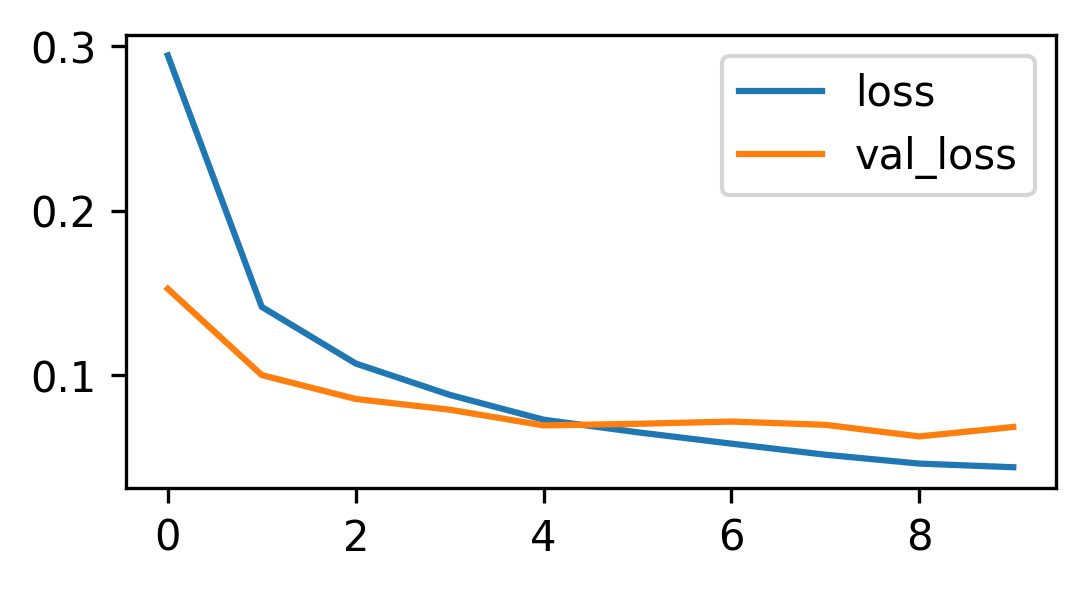

In [12]:
plt.figure(figsize=(4,2),dpi=300)
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

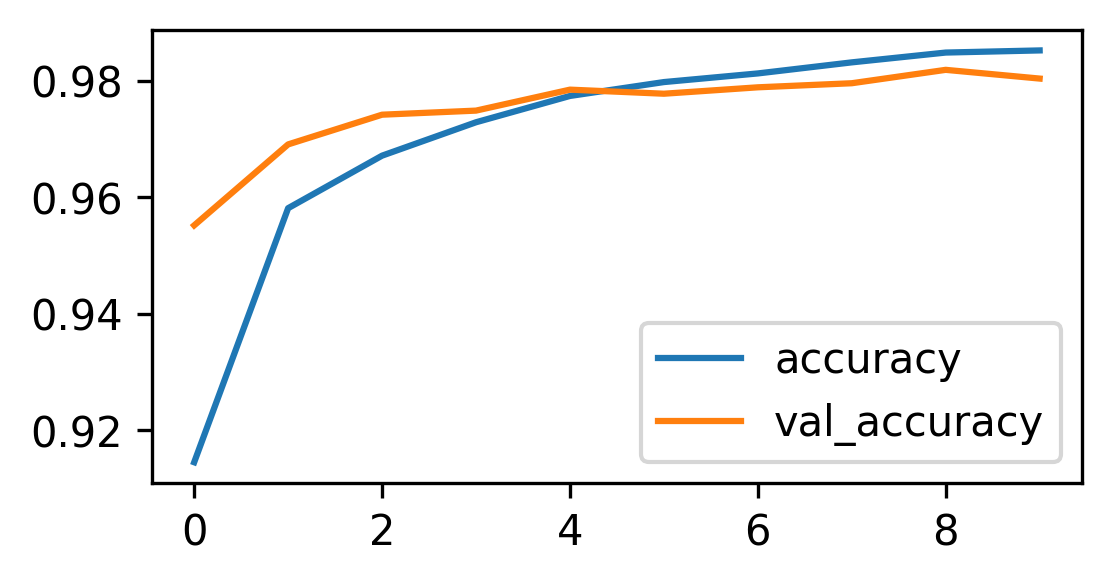

In [13]:
plt.figure(figsize=(4,2),dpi=300)
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [15]:
from sklearn.metrics import confusion_matrix

In [21]:
cfx_mtx = confusion_matrix(y_test,y_pred)

In [18]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [26]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [25]:
y_pred = model.predict(X_test).argmax(axis=1)

In [27]:
import seaborn as sns

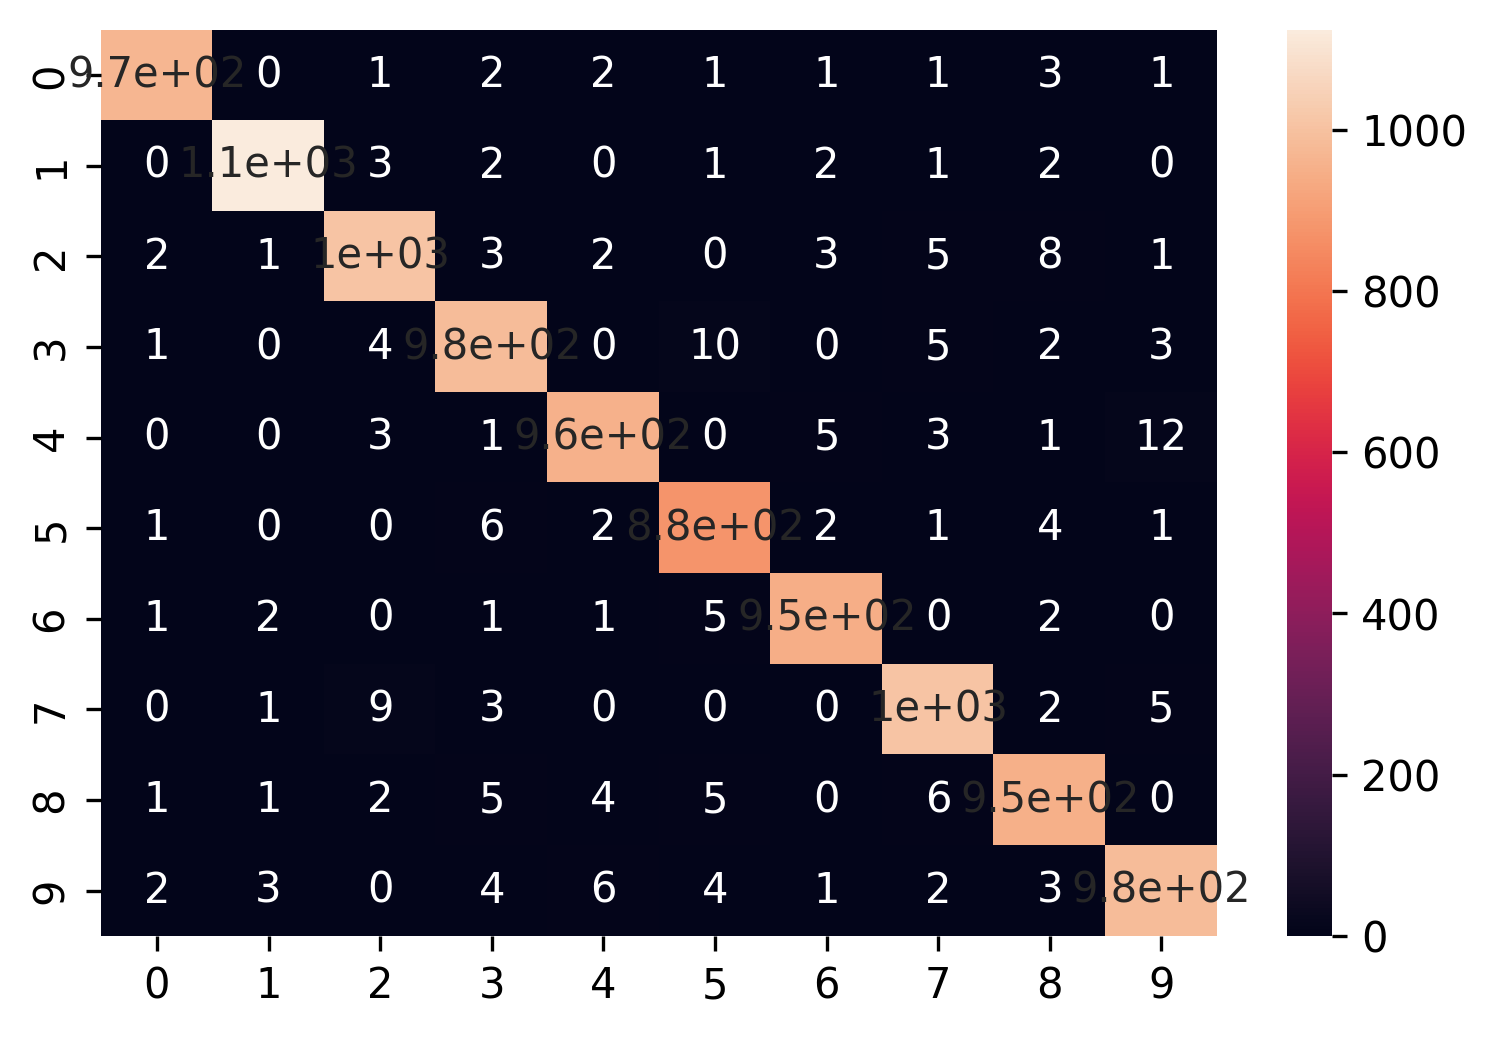

In [31]:
plt.figure(figsize=(6,4),dpi=300)
sns.heatmap(cfx_mtx,annot=True)